### Pandas 객체(자료구조)
- 1차원 : 시리즈(Series)
- 2차원 : 데이터프레임(DataFrame)

In [142]:
# pandas 모듈을 불러와서 pd라는 별칭으로 사용
import pandas as pd

In [143]:
# 1차원 시리즈 생성
# list를 사용해서 Series 생성
# 도시별 인구수를 나타내는 Series 생성
pop = pd.Series([9602000,3344000,1488000,2419000])
pop

0    9602000
1    3344000
2    1488000
3    2419000
dtype: int64

In [144]:
# 시리즈 데이터에 인덱스를 지정하기
pop = pd.Series([9602000,3344000,1488000,2419000], index = ['서울','부산','광주','대구'])
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
dtype: int64

In [145]:
# 딕셔너리를 이용해서 시리즈 생성해보기
# 면적에 대한 정보를 생성
area = pd.Series({'서울':605.2,'부산':770.1,'광주':501.1,'대구':883.5})
area

서울    605.2
부산    770.1
광주    501.1
대구    883.5
dtype: float64

- 데이터 속성 확인

In [146]:
# 1. value값만 확인하고 싶을 때
pop.values # 출력결과의 형태 : Numpy 배열

array([9602000, 3344000, 1488000, 2419000], dtype=int64)

In [147]:
# 2. 시리즈의 인덱스 값을 확인하고 싶을 때
pop.index # object --> 문자열 자료형

Index(['서울', '부산', '광주', '대구'], dtype='object')

In [148]:
# 3. 시리즈의 데이터 타입 확인
pop.dtype
area.dtype

dtype('float64')

#### 시리즈 이름 지정
- 시리즈의 이름은 DataFrame의 컬럼명이 된다

In [149]:
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
dtype: int64

In [150]:
pop.name = '2020 인구'
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [151]:
pop.index.name = '도시'
pop

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

#### 시리즈 데이터 갱신(수정, 삭제, 추가)

In [152]:
# 갱신(수정)
# 1. 인덱스 위치 접근
# 2. 값을 대입
pop.index.name = '지역'
pop

지역
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [153]:
# 부산 데이터를 3500000으로 수정
pop['부산'] = 3500000
pop

지역
서울    9602000
부산    3500000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [154]:
# 삭제 : drop()
# 광주 도시 삭제
pop.drop('광주', inplace = True)

# inpalce = False : 데이터를 삭제하고 초기화를 시켜주지 않음
# pop = pop.drop('광주')
# inpalce = True : 데이터를 삭제하고 원래 위치에 반영(초기화)

In [155]:
pop

지역
서울    9602000
부산    3500000
대구    2419000
Name: 2020 인구, dtype: int64

In [156]:
# 추가 : 없는 키 값 불러주고 갑을 대입
# '거제' : 250000
pop['거제'] = 250000
pop

지역
서울    9602000
부산    3500000
대구    2419000
거제     250000
Name: 2020 인구, dtype: int64

In [157]:
# 인덱스 이름 변경 : 지역 --> 도시
pop.index.name = '도시'
# 천안 데이터 추가 : '천안' : 660000
pop['천안'] = 660000
# 부산 데이터 수정 --> 3344000
pop['부산'] = 3344000
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [158]:
# 인덱스 이름 설정 --> 도시
area.index.name = '도시'
# 시리즈 이름 설정 --> 면적(㎢)
area.name = '면적(㎢)'
# 데이터 수정(광주 -> 거제), 천안(450.1) 추가
area.drop('광주', inplace=True)
area['거제'] = 501.1
area['천안'] = 450.1
area

도시
서울    605.2
부산    770.1
대구    883.5
거제    501.1
천안    450.1
Name: 면적(㎢), dtype: float64

In [159]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

#### 시리즈 병합(concat)
- 1차원을 연결하여 2차원으로 변환
- 시리즈의 이름이 데이터프레임의 컬럼명이 되는지 확인

In [160]:
# axis = 0 : 행방향 (수직방향)
# axis = 1 : 열방향 (수평방향)
df = pd.concat([pop, area]) # axis 기본값 -> 행방향
df

도시
서울    9602000.0
부산    3344000.0
대구    2419000.0
거제     250000.0
천안     660000.0
서울        605.2
부산        770.1
대구        883.5
거제        501.1
천안        450.1
dtype: float64

In [161]:
df2 = pd.concat([pop, area], axis=1) # axis = 1 --> 열방향
df2

# 시리즈의 이름이 컬럼명이 됨

,2020 인구,면적(㎢)
도시,,
서울,9602000,605.2
부산,3344000,770.1
대구,2419000,883.5
거제,250000,501.1
천안,660000,450.1


#### 2차원 데이터프레임 생성
- 리스트, 딕셔너리 자료를 활용하여 생성 가능

In [162]:
# 딕셔너리를 이용하여 데이터프레임 생성하기
data = {'2020 인구': [9602000, 3344000, 2419000], '면적(㎢)':[605.2, 770.1, 883.5]} # 키값이 컬럼명
data
df3 = pd.DataFrame(data, index=['서울','부산','대구'])
df3

,2020 인구,면적(㎢)
서울,9602000,605.2
부산,3344000,770.1
대구,2419000,883.5


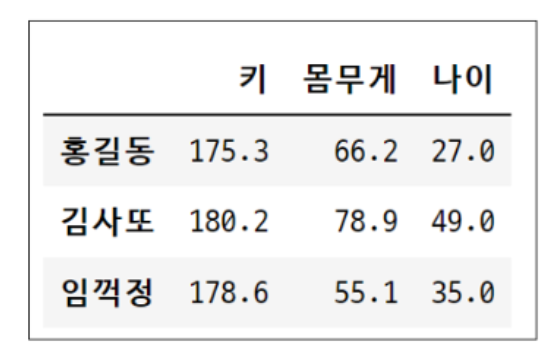

In [163]:
# 딕셔너리 이용
p_data = {'키':[175.3, 180.2, 178.6],'몸무게':[66.2, 78.9, 55.1],'나이':[27.0,49.0,35.0]}
p_data1 = pd.DataFrame(p_data, index=['홍길동', '김사또','임꺽정'])
p_data1

,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


In [164]:
p_t = pd.Series({'홍길동':175.3,'김사또':180.2,'임꺽정':178.6})
p_t.name = '키'
p_w = pd.Series({'홍길동':66.2,'김사또':78.9,'임꺽정':55.1})
p_w.name = '몸무게'
p_a = pd.Series({'홍길동':27.0,'김사또':49.0,'임꺽정':35.0})
p_a.name = '나이'

p_data2 = pd.concat([p_t,p_w,p_a] , axis=1)
p_data2


,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


In [165]:
# 행과 열을 전환해주는 키워드 : .T(전치 - transpose)
data1_T = p_data1.T
data1_T

,홍길동,김사또,임꺽정
키,175.3,180.2,178.6
몸무게,66.2,78.9,55.1
나이,27.0,49.0,35.0


### Pandas 데이터 접근하기 : 인덱싱 & 슬라이싱

#### 시리즈 인덱싱

In [166]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [167]:
# 인덱싱으로 거제 데이터 접근
pop['거제']
pop[3]

250000

In [168]:
# 여러개 도시 데이터를 한번에 인덱싱하기
pop[['서울','대구','천안']]
pop[[0, 2, 4]]
pop[::2]

도시
서울    9602000
대구    2419000
천안     660000
Name: 2020 인구, dtype: int64

#### 시리즈 슬라이싱

In [169]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [170]:
# 부산 - 천안 접근해보기
pop['부산':'거제'] # 문자열로 접근할 때는 뒷값이 포함
pop[1:3]          # 인덱스 번호로 접근할 때는 뒷값이 포함이 안된다.

도시
부산    3344000
대구    2419000
Name: 2020 인구, dtype: int64

#### 시리즈 불리언 인덱싱

In [171]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [172]:
# 인구수가 1000000 미만인 도시 확인하기
pop[pop < 1000000]

도시
거제    250000
천안    660000
Name: 2020 인구, dtype: int64

In [173]:
# 백만미만인 도시명만 확인하고 싶을 때
pop[pop < 1000000].index

Index(['거제', '천안'], dtype='object', name='도시')

In [174]:
# 인구수가 200만 이상 ~ 500만 이하인 도시 확인하기
pop[(pop >= 2000000) & (pop <= 5000000)].index

Index(['부산', '대구'], dtype='object', name='도시')

In [175]:
# 학생 2명에 대한 성적 데이터 프레임 생성

df_stu = pd.DataFrame({'java':[95,85],'python':[100,95],'db':[85,85],'html/css':[70,75]}, index=['dw','eh'])
df_stu

,java,python,db,html/css
dw,95,100,85,70
eh,85,95,85,75


In [176]:
# 'python' 과목 성적 데이터 접근
df_stu['python']

dw    100
eh     95
Name: python, dtype: int64

In [177]:
df_stu[['python']]

,python
dw,100
eh,95


In [178]:
df_stu[['python','db']]

,python,db
dw,100,85
eh,95,85


In [179]:
# df[:] -> 행 인덱싱
df_stu['java':'python']
df_stu['dw':'eh']
df_stu[1:]

,java,python,db,html/css
eh,85,95,85,75


#### 행, 열에 접근하는 인덱서
- df[] -> 컬럼 인덱싱, df[:] -> 행 인덱싱
- loc, iloc 인덱서 등장
- df.loc[행], df.loc[행,열], df.loc[행:행,[열1,열3]] -> 실제 인덱스명 또는 컬럼명을 사용하여 데이터 접근
- df.iloc[행], df.iloc[행,열], df.iloc[행:행,[열1,열3]] -> numpy array 인덱스 값을 사용하여 데이터 접근

In [180]:
# dw 행 데이터 접근
# loc : 눈에 보이는 label 라벨 값
df_stu.loc['dw']

java         95
python      100
db           85
html/css     70
Name: dw, dtype: int64

In [181]:
# iloc : 인덱스 값
df_stu.iloc[0]

java         95
python      100
db           85
html/css     70
Name: dw, dtype: int64

In [182]:
# df_stu dw, eh 행인덱싱
df_stu.loc['dw':'eh']
# df_stu eh, dw 행인덱싱
df_stu.loc[['eh','dw']]

,java,python,db,html/css
eh,85,95,85,75
dw,95,100,85,70


In [183]:
# df_stu iloc 열 접근
# java 컬럼 접근해보기
df_stu.iloc[:,0]
# dw, java 점수 접근
df_stu.iloc[0,0]

95

In [184]:
# df_stu dw의 python, html/css 점수에 접근해보기
df_stu.iloc[0,1::2]
df_stu.iloc[0,[1,3]]
df_stu.loc['dw',['python','html/css']]
df_stu.loc['dw','python':'html/css':2]

python      100
html/css     70
Name: dw, dtype: int64

#### DataFrame 불리언 인덱싱
- 논리 연산자를 활용하여 데이터 접근

In [185]:
# 행 데이터 추가
# 1. 행 접근(없는 이름) 2. 대입
df_stu.loc['dh'] = [95,95,85,100]

In [186]:
df_stu

,java,python,db,html/css
dw,95,100,85,70
eh,85,95,85,75
dh,95,95,85,100


In [187]:
# 컬럼 추가
# 1. 컬럼 접근(없는 이름) 2. 대입
df_stu.loc[:,'ml'] = [100,100,100]
df_stu

,java,python,db,html/css,ml
dw,95,100,85,70,100
eh,85,95,85,75,100
dh,95,95,85,100,100


In [188]:
# java 성적에서 90이상인 사람의 이름은 ?
# 1. java 컬럼 접근
# 2. 논리 연산자로 조건 질문 던지기
# 3. True, False -> data에 대입 (masking)
df_stu[df_stu.loc[:,'java'] >= 90] # 불리언 인덱싱이 행 인덱싱으로 작용

df_stu[df_stu.loc[:,'java'] >= 90].index

Index(['dw', 'dh'], dtype='object')

In [189]:
# python 성적이 100점인 사람은 몇명인가 ?
py_100 = df_stu[df_stu['python'] == 100].index.size
print(f'python 성적이 100점인 사람은 몇명인가 ? {py_100}명')

python 성적이 100점인 사람은 몇명인가 ? 1명


In [190]:
# df_stu[df_stu.iloc[0] == 100] # iloc 인덱서는 불리언 인덱싱과 호환이 안됨
df_stu[df_stu.loc[:,'java'] == 100] # loc 인덱서는 불리언 인덱싱과 호환이 된다

,java,python,db,html/css,ml


### Pandas 유용한 함수

####  value_counts() : 값이 등장한 횟수 세는 기능

In [191]:
df_stu['java'].value_counts()

95    2
85    1
Name: java, dtype: int64

In [192]:
# python에서 가장 많이 나온 성적의 개수는 ?
df_stu['python'].value_counts()

95     2
100    1
Name: python, dtype: int64

In [193]:
# 빈도수 파악 -> 카테고리 형식(범주형) 데이터에 자주 사용
# 기술통계량 파악 -> 값의 크고 작음의 의미가 있는 숫자 데이터(수치형) 자주 사용

#### sort_values(), sort_index() : 정렬하는 함수

In [194]:
# value 값 기준 정렬, 기본값 : 오름차순 정렬 (ascending = True)
# ascending = False : 내림차순 정렬
pop.sort_values(ascending=False)

도시
서울    9602000
부산    3344000
대구    2419000
천안     660000
거제     250000
Name: 2020 인구, dtype: int64

In [195]:
# index 정렬  기본값 : 오름차순 정렬 (ascending = True)
# ascending = False : 내림차순 정렬
pop.sort_index(ascending = False)

도시
천안     660000
서울    9602000
부산    3344000
대구    2419000
거제     250000
Name: 2020 인구, dtype: int64

#### drop() : 데이터를 삭제하는 함수
- 행 이름 삭제해줘, 컬럼 이름 삭제해줘 !
- axis = 0 (행 방향으로 데이터 확인), axis = 1 (열 방향으로 데이터 확인)

In [196]:
# 행 데이터 삭제
df_stu.drop('dh')

,java,python,db,html/css,ml
dw,95,100,85,70,100
eh,85,95,85,75,100


In [197]:
# 열 데이터 삭제
# ml 삭제하기
df_stu.drop('ml', axis=1, inplace=True)